# Tensorflow实现图像卷积

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import cv2

In [22]:
def convolute_image(im_link, kernel):
    with tf.Graph().as_default():
        img = plt.imread(im_link)
        img = np.asarray(img, dtype='float32') / 256.
        img_shape = img.shape
        img_reshaped = img.reshape(1, img_shape[0], img_shape[1], 3)

        kernel_shape = kernel.shape
        kernel_reshaped = np.ndarray(shape=(kernel_shape[0], kernel_shape[1], 3, 3), dtype="float32")
        for i in range(3):
            for j in range(3):
                kernel_reshaped[:, :, i, j] = kernel

        #  Variables
        x = tf.placeholder('float32', [1, None, None, 3])
        k = tf.get_variable('w', initializer=tf.to_float(kernel_reshaped))

        #  Operations
        conv = tf.nn.conv2d(x, k, strides=[1, 1, 1, 1], padding='SAME')

        init = tf.global_variables_initializer()
        with tf.Session() as session:
            session.run(init)
            conv_op = session.run(conv, feed_dict={x: img_reshaped})

            #  Print result of convoluting with Kernels
            return conv_op[0, :, :, :]

In [3]:
sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype="float32")
identity = np.array(([0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]), dtype="float32")
edge_detect = np.array(([-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]), dtype="float32")
box_blur = np.array(([1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9],
                     [1/9, 1/9, 1/9]), dtype="float32")
gauss_blur = np.array(([1, 4, 6, 4, 1],
                       [4, 16, 24, 16, 4],
                       [6, 24, 36, 24, 6],
                       [4, 16, 24, 16, 4],
                       [1, 4, 6, 4, 1]), dtype="float32")/256


In [17]:
src = cv2.cvtColor( cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2GRAY)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


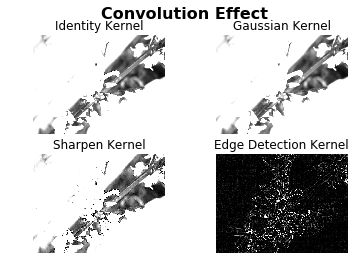

In [23]:
fig = plt.figure()
fig.suptitle("Convolution Effect", fontsize=16, fontweight='bold')
fig_gs = gs.GridSpec(2, 2)

ax = fig.add_subplot(fig_gs[0, 0])
ax.imshow(convolute_image(im_link='../datas/f2.jpg', kernel=identity),'gray')
ax.set_title("Identity Kernel")
ax.set_axis_off()

ax2 = fig.add_subplot(fig_gs[0, 1])
ax2.imshow(convolute_image(im_link='../datas/f2.jpg', kernel=gauss_blur))
ax2.set_axis_off()
ax2.set_title("Gaussian Kernel")

ax3 = fig.add_subplot(fig_gs[1, 0])
ax3.imshow(convolute_image(im_link='../datas/f2.jpg', kernel=sharpen))
ax3.set_axis_off()
ax3.set_title("Sharpen Kernel")

ax4 = fig.add_subplot(fig_gs[1, 1])
ax4.imshow(convolute_image(im_link='../datas/f2.jpg', kernel=edge_detect))
ax4.set_title("Edge Detection Kernel")
ax4.set_axis_off()